# Predicting Air Quality in Hetauda Using Machine Learning

Importing necessary Libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 1.Loading the Dataset

In [238]:
df = pd.read_csv("..\data\processed\hetauda-cleaned.csv")

In [239]:
df.head()

,date,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity,pm25
0,2022-04-01,29.4,20.0,5.2,956.2,19.8,73.0,64.0
1,2022-04-02,29.3,19.7,5.7,959.0,20.5,81.0,61.0
2,2022-04-03,28.6,21.3,4.5,956.5,19.1,72.0,54.0
3,2022-04-04,31.3,20.4,5.9,956.8,17.4,62.0,59.0
4,2022-04-05,32.9,20.7,6.4,959.0,16.4,55.0,59.0


## Seperating the columns for prediction in x and y variables
The dataset needs to be seperated in x and y before the PM25 prediction
* The six columns from [1 : 6] will be assigned as x.
* The date column will not be taken into consideration because of string value '-'.
* The last column which is PM25 will be assigned in y.

In [240]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1].values

In [241]:
x.head()

,temp_max,temp_min,wind_speed,pressure,dew_point,relative_humidity
0,29.4,20.0,5.2,956.2,19.8,73.0
1,29.3,19.7,5.7,959.0,20.5,81.0
2,28.6,21.3,4.5,956.5,19.1,72.0
3,31.3,20.4,5.9,956.8,17.4,62.0
4,32.9,20.7,6.4,959.0,16.4,55.0


In [242]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

## Spiliting the dataset into training and testing
* The 80% of the dataset will be used for training the machine
* Whereas rest of the 20% will be used for testing purpose

For this we have to import library called train_test_spilit()

In [243]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

## Using linear regression for the prediction of the pm25 column
* First we will import LinearRegression model from sklearn library
* Then, we will fit x_train and y_train to predict the y column which is pm25 

In [244]:
from sklearn.linear_model import LinearRegression

In [245]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predicting y by giving x_test as input
* Saving the value in y_pred so that we can compare the predicted value with y_test.
* This comparision will help find out the accuracy of the trained model.
* Finally, by the help of this we can calculate the error

In [246]:
y_pred = regressor.predict(x_test)
y_pred

array([ 69.35811927,  87.46094279,  81.74453775,  65.34196356,
        72.27036892,  18.26979505, 104.74026093,  44.23860531,
        52.24151253,  45.51558073,  74.51636556, 119.05191671,
        32.73685792,  79.31618991,  25.38544276,  57.92800398,
        77.84877454,  57.6561637 ,  40.56195909,  83.63590789,
       100.89926752,  30.09381956,  78.86482114,  40.93918054,
        44.48607651,  43.49432406,  67.91557955,  32.20527814,
        77.13055096,  85.29697514,  36.00844752, 123.27292488,
        30.93612708,  34.06900117,  58.57461277,  56.63780085,
        47.95338455,  85.15783562,  64.57463739,  81.5912133 ,
        68.26762484,  35.24885307,  49.99503142,  70.47773637,
        57.59889153,  64.66193047,  25.98763796,  31.20981583,
        24.69043754,  25.91186346,  98.57271286,  26.56366649,
        85.57120461,  26.92601953,  23.12231625,  76.80268904,
        89.60867579,  28.76820008,  35.63084738,  57.61233936,
        30.28170434,  34.84407113,  81.25581231,  72.72

## Making the DataFrame so that we can check both value side by side

In [247]:
df_pred = pd.DataFrame({'Predicted_Value': y_pred , 'Real_value': y_test})
df_pred

,Predicted_Value,Real_value
0,69.358119,55.00
1,87.460943,79.33
2,81.744538,78.00
3,65.341964,20.00
4,72.270369,48.00
...,...,...
123,90.877965,77.15
124,34.565009,5.00
125,31.255076,27.00
126,75.278188,130.00


## Creating the Scatter Plot to compare Real vs Predicted Values

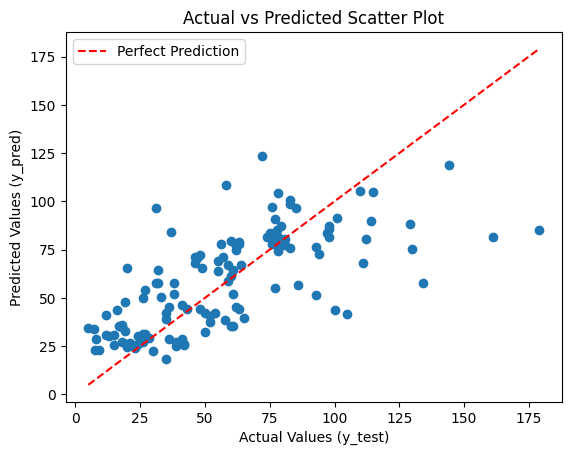

In [248]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Scatter Plot")
plt.legend()
plt.show()

## Calculating the Root_Mean_Squared_error
* First we will import metrics library from sklearn.
* This contain model called root_mean_squared_error() which take two inputs
* We will give y_test and y_pred to calculate the error

In [ ]:
from sklearn import metrics

err = np.sqrt(metrics.root_mean_squared_error(y_test,y_pred))
err

4.998202448564526

## Explaining the result
 From the result we can see that the root mean squared error is around 5.This means on average our predictions are off by about 5 units. For example, If the true value is 80, our prediction will typically be somewhere around 75 → 85, which is actually quite good.

 ### This means the model is performing well.